Gunakan dataset `Lab 10 Data - data_rumah.txt`. Dataset baru tersebut memiliki 3 variabel juga:

> `a. House Size (sq. ft.)`

> `b. number of bedrooms`

> `c. house price ($)`

1. Menggunakan dataset tersebut, Anda hendak mengetahui korelasi antara `House Size (sq. ft.)` dan `number of bedrooms` terhadap `house price ($)`. Jelaskan kemudian apa kesimpulan yang Anda dapat dengan menjawab pertanyaan dibawah ini:

> `a. berapa nilai $R^2$ untuk variabel House Size (sq. ft.) dan house price ($)?`

> `b. berapa nilai $R^2$ untuk variabel number of bedrooms dan house price ($)?`


**Upload coding yang Anda buat beserta jawaban atas pertanyaan-pertanyaan tersebut ke Github masing-masing.**

Lalu kirimkan link github dan screenshoot halaman github tersebut ke Google Classroom 




In [6]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [7]:

#import data rumah
data = np.genfromtxt('data_rumah.txt', delimiter=',') # sesuaikan dengan nama file yang sudah ter upload
data

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [8]:
# memisahkan kolom

# `x1. House Size (sq. ft.)`

# `x2. number of bedrooms`

# `y. house price ($)`


# Ekstrak kolom pertama dari data tersebut ke dalam sebuah variabel baru x1 (ukuran rumah dalam ukuran square feet)
x1 = data[:,0]

# Ekstrak kolom kedua dari data tersebut ke dalam sebuah variabel baru x2 (jumlah kamar tidur)
x2 = data[:,1]

# Ekstrak kolom ketiga dari data tersebut ke dalam sebuah variabel baru y (harga rumah)
y = data[:,2]


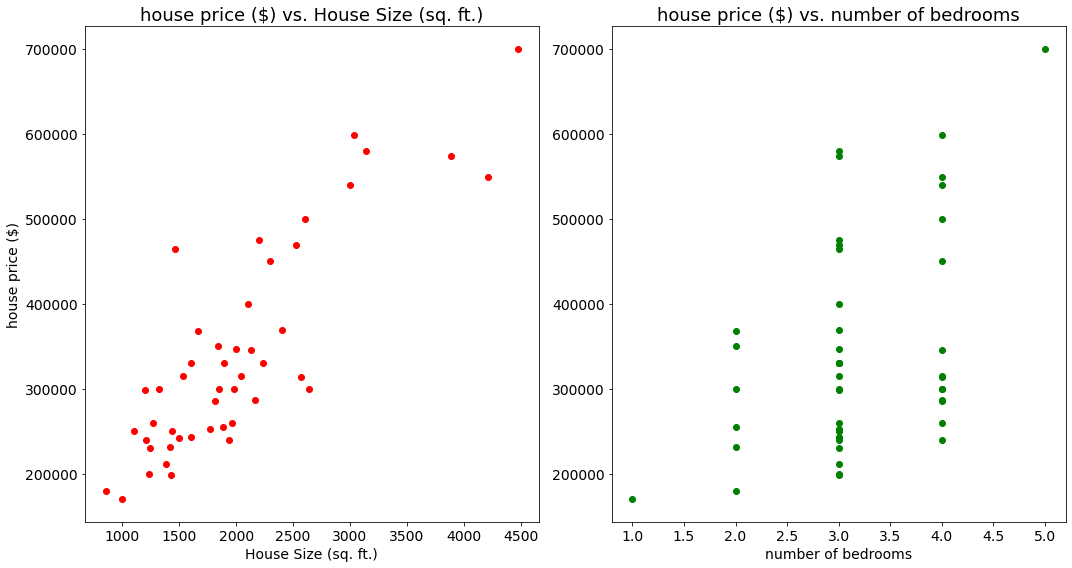

In [23]:

# membuat scatter plot
xlabels = ['House Size (sq. ft.)', 'number of bedrooms']
colors = ['red', 'green']
fig, axs = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 8)


for i, ax in enumerate(axs):
    ax.scatter(data[:,i], y, c=colors[i])
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_title('house price ($) vs. ' + xlabels[i], fontsize=18)
    if i ==0:
        ax.set_ylabel('house price ($)', fontsize=14)
    ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

In [24]:
#menentukan data dari regresi linear
xone_params = stats.linregress(x1, y)
xtwo_params = stats.linregress(x2, y)

In [25]:
# melihat hasil nya:
print(xone_params)
print(xtwo_params)

LinregressResult(slope=134.52528772024132, intercept=71270.49244872911, rvalue=0.8549875928781253, pvalue=2.0272680958766845e-14, stderr=12.164967291909832, intercept_stderr=26149.978557654304)
LinregressResult(slope=72669.64776357819, intercept=110034.4145367415, rvalue=0.4422611170489722, pvalue=0.0018546425388804454, stderr=21968.75515494713, intercept_stderr=71582.48854649841)


In [18]:
#memisahkan nilai slope dan intercept 
xone_slope = xone_params[0]
xone_yint = xone_params[1]

xtwo_slope = xtwo_params[0]
xtwo_yint = xtwo_params[1]

print(f"slope data 1: {xone_slope}")
print(f"intercept data 1: {xone_yint}")
print(f"slope data 1: {xtwo_slope}")
print(f"intercept data 1: {xtwo_yint}")


slope data 1: 134.52528772024132
intercept data 1: 71270.49244872911
slope data 1: 72669.64776357819
intercept data 1: 110034.4145367415


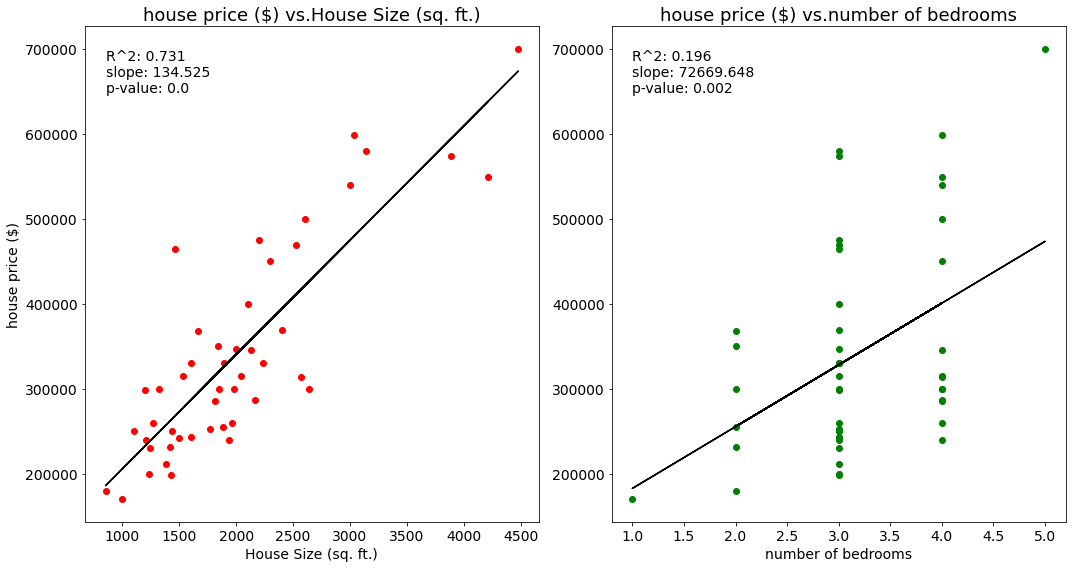

In [20]:
#buat regresi linear
# Membuat array NumPy baru dari nilai fitted y untuk setiap relasi
ys_fit_one = xone_yint + xone_slope * x1
ys_fit_two = xtwo_yint + xtwo_slope * x2

# Menempatkan array-array tersebut ke dalam sebuah list untuk dihitung
ys_fits = [ys_fit_one, ys_fit_two]
params = [xone_params, xtwo_params]

# Menge - plot nilai-nilai di atas scatter plot untuk setiap relasinya
# Menge - plot setiap masing-masing variabel (variabel penjelas terhadap variabel respons)
xlabels = ['House Size (sq. ft.)', 'number of bedrooms']
fig, axs = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 8)


for i, ax in enumerate(axs):
    ax.scatter(data[:, i], y, c=colors[i])
    ax.plot(data[:, i], ys_fits[i], c='black')
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_title('house price ($) vs.' + xlabels[i], fontsize=18)
    if i ==0:
        ax.set_ylabel('house price ($)', fontsize=14)
    ax.tick_params(labelsize=14)
    
    slope = str(round(params[i][0],3))
    r_squared = str(round(params[i][2] ** 2,3))
    p_value = str(round(params[i][3],3))
    
    ax.text(data[:, i].min(), y.max(),
            'R^2: ' + r_squared + '\nslope: ' + slope + '\np-value: ' + p_value,
            fontsize=14, verticalalignment='top')
    
plt.tight_layout()
plt.show()

**a. berapa nilai $R^2$ untuk variabel House Size (sq. ft.) dan house price ($)?**

= Nilai $R^2$ dari variabel House Size (sq. ft.) dan house price ($) adalah sebesar 0.731. Nilai tersebut cukup besar yang membuktikan bahwa harga rumah dan besar dari rumah memiliki hubungan atau korelasi yang cukup besar. Jadi semakin besar ukuran rumah, maka semakin mahal harganya

**b. berapa nilai $R^2$ untuk variabel number of bedrooms dan house price ($)?**

= Nilai $R^2$ dari variabel number of bedrooms dan house price ($) adalah sebesar 0.196. Nilai tersebut cukup besar yang membuktikan bahwa harga rumah dan jumlah kamar tidur memiliki hubungan atau korelasi yang cukup rendah atau kurang berkorelasi. Namun masih memiliki kecenderungan positif, yaitu semakin banyak jumlah kamar maka semakin mahal harga rumah tersebut
